In [1]:
import pandas as pd 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [2]:
data = pd.read_csv("student-por.csv", delimiter=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# 1 What is the distribution of students' ages in the dataset?


In [3]:
age_distribution = data['age'].value_counts().sort_index()
age_distribution

15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
Name: age, dtype: int64

# 2 How many students belong to each school (GP or MS)?


In [4]:
school_count = data[data['school'].isin(['GP', 'MS'])]['school'].value_counts().reset_index()
school_count

,index,school
0,GP,423
1,MS,226


# 3 What is the gender distribution of students?


In [5]:
gender_distribution = data['sex'].value_counts().reset_index()
gender_distribution

,index,sex
0,F,383
1,M,266


# 4 What is the distribution of students' travel times to school?


In [6]:
travel_time_distribtion = data['traveltime'].value_counts().reset_index()
travel_time_distribtion

,index,traveltime
0,1,366
1,2,213
2,3,54
3,4,16


# 5 How do the first period grades (G1) vary with study time (studytime)?


In [7]:
studytime = data.groupby('studytime')['G1'].mean().reset_index()
studytime

,studytime,G1
0,1,10.504717
1,2,11.537705
2,3,12.422680
3,4,12.771429


# 6 Is there a correlation between students' weekly study time (studytime) and their final grades (G3)?


In [8]:
correlation_studytime = data['studytime'].corr(data['G3'])
correlation_studytime

0.24978868999886286

# 7 How do students' absences (absences) relate to their final grades (G3)?


In [9]:
correlation_absences = data['absences'].corr(data['G3'])
correlation_absences

-0.09137905643875617

# 8 Are there differences in final grades (G3) between students living in urban (U) and rural (R) areas?


In [10]:
urban_students = data[data['address'] == 'U']
rural_students = data[data['address'] == 'R']

t_statistic, p_value = ttest_ind(urban_students['G3'], rural_students['G3'])


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


alpha = 0.05 
if p_value < alpha:
    print("There is a statistically significant difference in final grades between urban and rural students.")
else:
    print("There is no statistically significant difference in final grades between urban and rural students.")

T-Statistic: 4.325264214751824
P-Value: 1.764153460922413e-05
There is a statistically significant difference in final grades between urban and rural students.


# 9 What is the relationship between family size (famsize) and the quality of family relationships (famrel)?


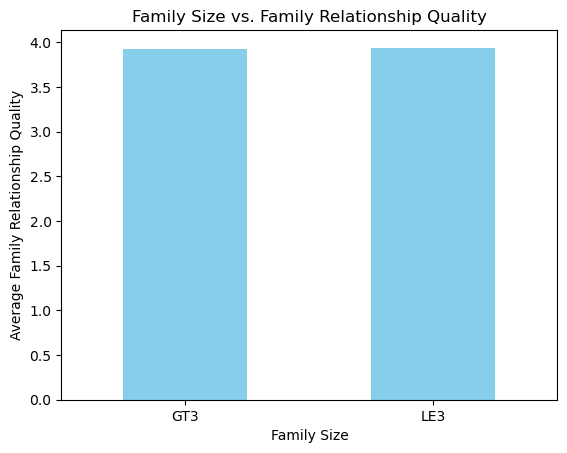

Mean Family Relationship Quality for GT3: 3.927789934354486
Mean Family Relationship Quality for LE3: 3.9375


In [11]:
famsize_mean = data.groupby('famsize')['famrel'].mean()

famsize_mean.plot(kind='bar', color='skyblue')
plt.title('Family Size vs. Family Relationship Quality')
plt.xlabel('Family Size')
plt.ylabel('Average Family Relationship Quality')
plt.xticks(rotation=0)
plt.show()

print("Mean Family Relationship Quality for GT3:", famsize_mean['GT3'])
print("Mean Family Relationship Quality for LE3:", famsize_mean['LE3'])

# 10 Does the presence of romantic relationships (romantic) affect students' alcohol consumption (Dalc and Walc)?


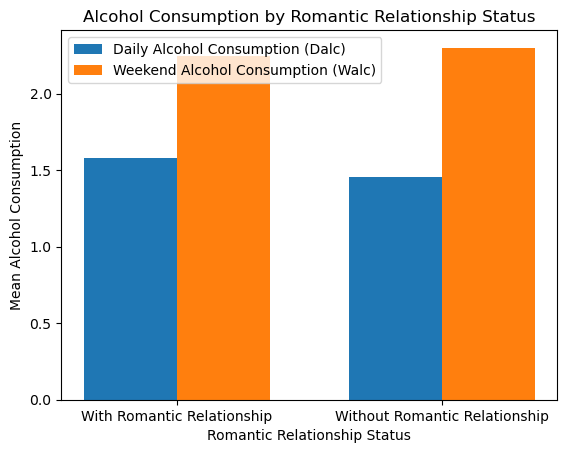

In [57]:
romantic_students = data[data['romantic'] == 'yes']
non_romantic_students = data[data['romantic'] == 'no']

mean_Dalc_romantic = romantic_students['Dalc'].mean()
mean_Dalc_non_romantic = non_romantic_students['Dalc'].mean()

mean_Walc_romantic = romantic_students['Walc'].mean()
mean_Walc_non_romantic = non_romantic_students['Walc'].mean()

labels = ['With Romantic Relationship', 'Without Romantic Relationship']
Dalc_means = [mean_Dalc_romantic, mean_Dalc_non_romantic]
Walc_means = [mean_Walc_romantic, mean_Walc_non_romantic]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, Dalc_means, width, label='Daily Alcohol Consumption (Dalc)')
rects2 = ax.bar([i + width for i in x], Walc_means, width, label='Weekend Alcohol Consumption (Walc)')

ax.set_xlabel('Romantic Relationship Status')
ax.set_ylabel('Mean Alcohol Consumption')
ax.set_title('Alcohol Consumption by Romantic Relationship Status')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# 11 How does the mother's education level (Medu) correlate with the father's education level (Fedu)?


In [13]:
correlation = data['Medu'].corr(data['Fedu'])
correlation

0.6474766091364951

# 12 Are there differences in students' final grades (G3) based on their parents' cohabitation status (Pstatus)?


In [14]:
cohabiting_students = data[data['Pstatus'] == 'T']
non_cohabiting_students = data[data['Pstatus'] == 'A']

t_statistic, p_value = ttest_ind(cohabiting_students['G3'], non_cohabiting_students['G3'])

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant difference in final grades between students with cohabiting parents and those with non-cohabiting parents.")
else:
    print("There is no statistically significant difference in final grades between students with cohabiting parents and those with non-cohabiting parents.")

T-Statistic: -0.019176989794419484
P-Value: 0.9847058259502668
There is no statistically significant difference in final grades between students with cohabiting parents and those with non-cohabiting parents.


# 13 Create a histogram of students' final grades (G3) to visualize the grade distribution.


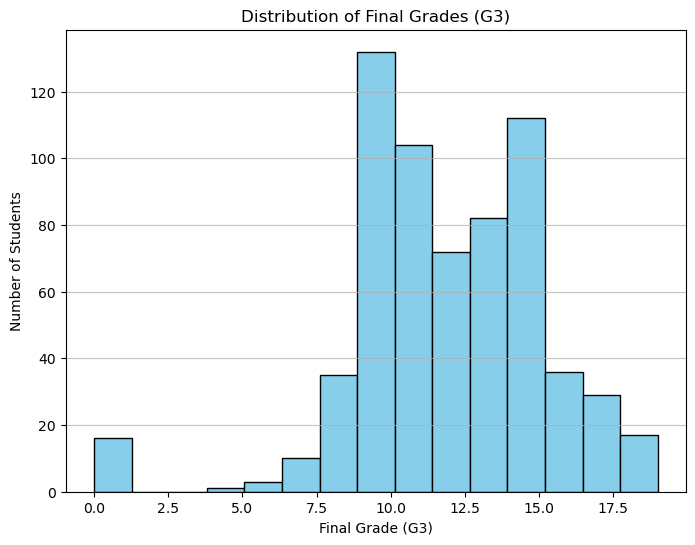

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['G3'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.grid(axis='y', alpha=0.75)
plt.show()

# 14 Generate a scatter plot to show the relationship between students' age and their first period grades (G1).


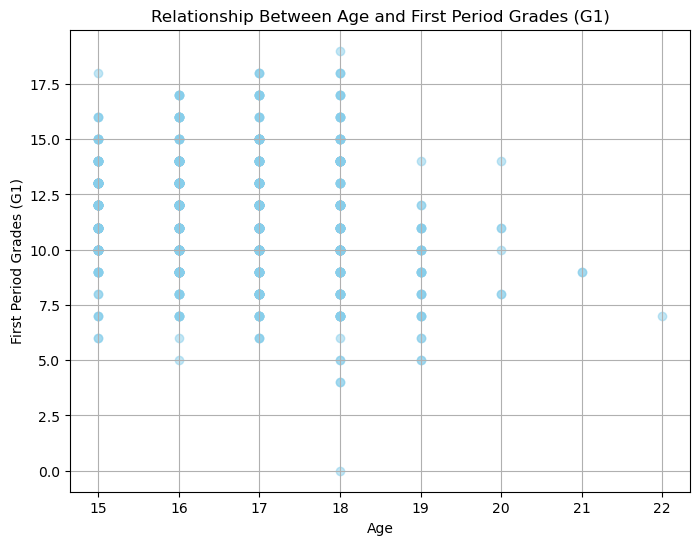

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['G1'], alpha=0.5, color='skyblue')
plt.title("Relationship Between Age and First Period Grades (G1)")
plt.xlabel("Age")
plt.ylabel("First Period Grades (G1)")
plt.grid()
plt.show()

# 15 Create a bar chart to compare the average final grades (G3) of students with and without extra educational support (schoolsup).


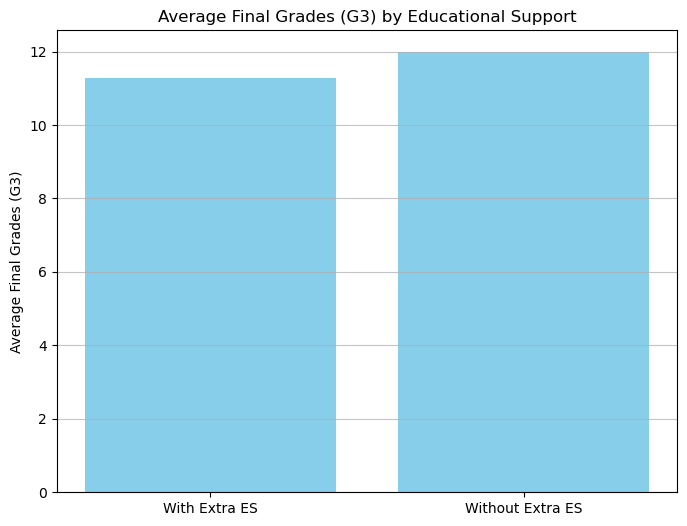

In [54]:
grades_with_schoolsup = data[data['schoolsup'] == 'yes']['G3'].mean()
grades_without_schoolsup = data[data['schoolsup'] == 'no']['G3'].mean()

labels = ['With Extra ES', 'Without Extra ES']
grades_means = [grades_with_schoolsup, grades_without_schoolsup]

plt.figure(figsize=(8, 6))
plt.bar(labels, grades_means, color='skyblue')
plt.title("Average Final Grades (G3) by Educational Support")
plt.ylabel("Average Final Grades (G3)")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 16 How do final grades (G3) in the math course compare to final grades in the Portuguese course for students who belong to both datasets?

In [18]:

data_math = pd.read_csv("student-mat.csv", delimiter=";")
data_por = pd.read_csv("student-por.csv", delimiter=";")

common_cols = ['school', 'sex', 'age', 'address', 'famsize']
merged_data = pd.merge(data_math, data_por, on=common_cols, suffixes=('_M', '_P'))

final_grades_comparison = merged_data[['G3_M', 'G3_P']]

print(final_grades_comparison.describe())


              G3_M         G3_P
count  7771.000000  7771.000000
mean     10.608159    12.707245
std       4.645223     2.707228
min       0.000000     0.000000
25%       9.000000    11.000000
50%      11.000000    13.000000
75%      14.000000    14.000000
max      20.000000    19.000000


# 17 Create a side-by-side box plot to compare the distribution of final grades (G3) between the math and Portuguese courses.

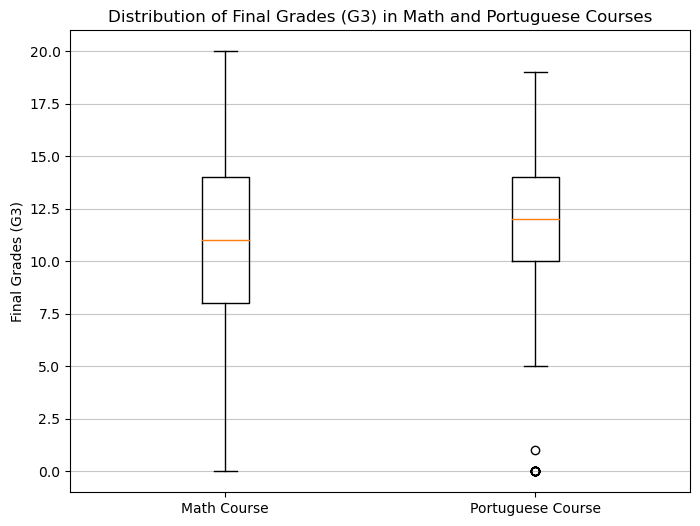

In [53]:
plt.figure(figsize=(8, 6))

plt.boxplot([data_math['G3'], data_por['G3']], labels=['Math Course', 'Portuguese Course'])

plt.title('Distribution of Final Grades (G3) in Math and Portuguese Courses')
plt.ylabel('Final Grades (G3)')
plt.grid(axis='y',  alpha=0.7)
plt.show()

# 18 Is there a significant difference in the average final grades (G3) between male and female students? Conduct a two-sample t-test and visualize the results.


T-Statistic: -3.310937693029702
P-Value: 0.000981528706137396


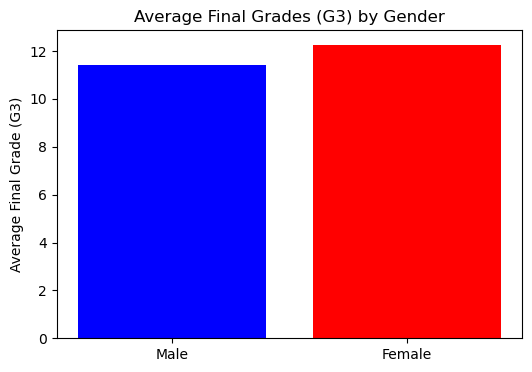

In [20]:
grades_male = data[data['sex'] == 'M']['G3']
grades_female = data[data['sex'] == 'F']['G3']

t_statistic, p_value = ttest_ind(grades_male, grades_female)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], [grades_male.mean(), grades_female.mean()], color=['blue', 'red'])
plt.title('Average Final Grades (G3) by Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()


# 19 Can you create a new variable that categorizes students into age groups (e.g., 15-17, 18-20, 21-22)? How does this grouping affect the analysis of other variables, such as study time or final math grades (G3)?


In [52]:
bins = [15, 17, 18, 20, 22]
labels = ['15-16', '17-19', '20-21', '22+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

print("Study Time by Age Group")
print(data.groupby('age_group')['studytime'].mean())

print("\n Final Math Grades G3 by Age Groups")
print(data.groupby('age_group')['G3'].mean())

Study Time by Age Group
age_group
15-16    1.914530
17-19    2.014286
20-21    1.815789
22+      2.000000
Name: studytime, dtype: float64

 Final Math Grades G3 by Age Groups
age_group
15-16    12.126068
17-19    11.771429
20-21     9.921053
22+       9.000000
Name: G3, dtype: float64


# 20 Apply a mathematical transformation, such as logarithm or square root, to the number of school absences (absences). How does this transformation impact the distribution of absences and its relationship with final math grades (G3)?


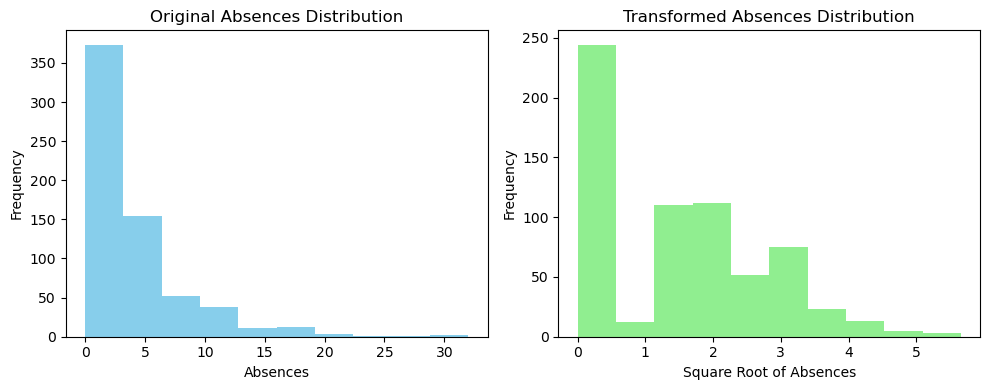

correlation between Transformed Absences and Final Math Grades (G3) ---> -0.07691336745552811


In [51]:
data['sqrt_absences'] = np.sqrt(data['absences'])

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data['absences'], bins=10, color='skyblue')
plt.title('Original Absences Distribution')
plt.xlabel('Absences')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['sqrt_absences'], bins=10, color='lightgreen')
plt.title('Transformed Absences Distribution')
plt.xlabel('Square Root of Absences')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

correlation = data['sqrt_absences'].corr(data['G3'])
print("correlation between Transformed Absences and Final Math Grades (G3) --->", correlation)

# 21 Create a new binary variable that indicates whether a student has above-average weekly study time (studytime). How does this modified variable relate to the final math grades (G3)?


In [23]:
correlation_sqrt_absences = data['sqrt_absences'].corr(data['G3'])
print("Correlation between Transformed Absences and Final Math Grades (G3):", correlation_sqrt_absences)

average_study_time = data['studytime'].mean()
data['above_average_studytime'] = (data['studytime'] > average_study_time).astype(int)

correlation_studytime = data['above_average_studytime'].corr(data['G3'])
print("Correlation ", correlation_studytime)

Correlation between Transformed Absences and Final Math Grades (G3): -0.07691336745552811
Correlation  0.22906603525792404


# 22 Apply feature scaling (e.g., Min-Max scaling or standardization) to numeric variables like age, absences, and study time. How does this scaling affect the relationships between these variables and math grades (G3)?


In [24]:

numeric_cols = ['age', 'absences', 'studytime', 'G3']

scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

correlation_scaled = data_scaled[numeric_cols].corr()['G3']
correlation_scaled

age         -0.106505
absences    -0.091379
studytime    0.249789
G3           1.000000
Name: G3, dtype: float64

# 23 Convert the categorical variables (e.g., "reason" and "Mjob") into numeric format using label encoding or one-hot encoding. How does this transformation make the data suitable for analysis, and what insights can you gain?


In [25]:
categorical_cols = ['reason', 'Mjob']

label_encoder = LabelEncoder()
data_label_encoded = data.copy()
data_label_encoded[categorical_cols] = data_label_encoded[categorical_cols].apply(label_encoder.fit_transform)

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
data_onehot_encoded = data.copy()
data_encoded = pd.get_dummies(data_onehot_encoded, columns=categorical_cols, drop_first=True)

print("Label Encoded Data:\n", data_label_encoded.head())
print("\nOne-Hot Encoded Data:\n", data_encoded.head())


Label Encoded Data:
   school sex  age address famsize Pstatus  Medu  Fedu  Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4     0   teacher  ...   
1     GP   F   17       U     GT3       T     1     1     0     other  ...   
2     GP   F   15       U     LE3       T     1     1     0     other  ...   
3     GP   F   15       U     GT3       T     4     2     1  services  ...   
4     GP   F   16       U     GT3       T     3     3     2     other  ...   

   Dalc Walc  health  absences  G1  G2  G3 age_group sqrt_absences  \
0     1    1       3         4   0  11  11     17-19      2.000000   
1     1    1       3         2   9  11  11     15-16      1.414214   
2     2    3       3         6  12  13  12     15-16      2.449490   
3     1    1       5         0  14  14  14     15-16      0.000000   
4     1    2       5         0  11  13  13     15-16      0.000000   

  above_average_studytime  
0                       1  
1                       1  
2    

# 24 Combine multiple variables (e.g., mother's education and father's education) to create a composite metric representing the overall parental education level. How does this new metric correlate with students' final math grades (G3)?


In [26]:
data['parental_education'] = data['Medu'] + data['Fedu']
correlation_parental_education = data['parental_education'].corr(data['G3'])
print("Corr between Parental Education Level & Final Math Grades (G3):", correlation_parental_education)


Corr between Parental Education Level & Final Math Grades (G3): 0.24921658167912006


# 25 Calculate the average weekly study time for students from urban (address = 'U') and rural (address = 'R') areas. Are there differences in study time between these two groups?

In [27]:
average_study_time_urban = data[data['address'] == 'U']['studytime'].mean()
average_study_time_rural = data[data['address'] == 'R']['studytime'].mean()

print('differeneces between U and R: ',average_study_time_urban,'and',  average_study_time_rural)

differeneces between U and R:  1.9646017699115044 and 1.8527918781725887


# 26 For ordinal variables like the quality of family relationships (famrel), assign meaningful labels to the numerical values (e.g., 'very bad,' 'bad,' 'neutral,' 'good,' 'excellent'). How does this transformation make the data more interpretable?


In [28]:
labels_map = {
    1: 'very bad',
    2: 'bad',
    3: 'neutral',
    4: 'good',
    5: 'excellent'
}

data['famrel_labels'] = data['famrel'].map(labels_map)

print(data[['famrel', 'famrel_labels']].head(10))

   famrel famrel_labels
0       4          good
1       5     excellent
2       4          good
3       3       neutral
4       4          good
5       5     excellent
6       4          good
7       4          good
8       4          good
9       5     excellent


# 27 Apply custom aggregation functions to summarize the data, such as calculating the range of ages within different schools or determining the percentage of students with Internet access (internet = 'yes') by gender. What insights do these custom aggregations provide?

In [29]:
age_range_by_school = data.groupby('school')['age'].agg(lambda x: x.max() - x.min())
age_range_by_school

school
GP    7
MS    5
Name: age, dtype: int64

#  28 If relevant, consider applying date-related functions to variables, such as determining the day of the week for which students have the most absences. How does this transformation reveal patterns related to attendance?


absences_by_day = data['absences'].sum()

absences_by_day

(exercise is not correct)

# 29 Calculate the median number of school absences (absences) for students with and without extra educational support (schoolsup).

In [30]:
data = pd.read_csv("student-por.csv", delimiter=";")

median_absences_with_support = data[data['schoolsup'] == 'yes']['absences'].median()
median_absences_without_support = data[data['schoolsup'] == 'no']['absences'].median()

print(f"Median with extra educational support: {median_absences_with_support}")
print(f"Median without extra educational support: {median_absences_without_support}")

Median with extra educational support: 2.0
Median without extra educational support: 2.0


# 30 Calculate the percentage of students who want to take higher education (higher) for each level of father's education (Fedu)

In [31]:
percentage_higher_by_fedu = data.groupby('Fedu')['higher'].apply(lambda x: (x == 'yes').mean() * 100)

print(percentage_higher_by_fedu)


Fedu
0    100.000000
1     81.034483
2     87.559809
3     93.893130
4     98.437500
Name: higher, dtype: float64


#  31 Calculate the correlation between travel time (traveltime) and final grades (G3).


In [32]:
correlation_traveltime_g3 = data['traveltime'].astype(float).corr(data['G3'].astype(float))

print(f"Correlation  {correlation_traveltime_g3}")


Correlation  -0.12717296675842057


# 32 Calculate the weighted average of final grades (G3) using study time (studytime) as weights.


In [33]:
weighted_average_g3 = (data['G3'] * data['studytime']).sum() / data['studytime'].sum()

weighted_average_g3

12.25219473264166

# 33 Find the student with the highest weekend alcohol consumption (Walc).


In [34]:
student_highest_walc = data.loc[data['Walc'].idxmax()]

print(student_highest_walc)


school             GP
sex                 M
age                16
address             U
famsize           GT3
Pstatus             T
Medu                4
Fedu                4
Mjob          teacher
Fjob          teacher
reason           home
guardian       mother
traveltime          1
studytime           2
failures            0
schoolsup          no
famsup            yes
paid              yes
activities        yes
nursery           yes
higher            yes
internet          yes
romantic          yes
famrel              4
freetime            4
goout               5
Dalc                5
Walc                5
health              5
absences            4
G1                 12
G2                 11
G3                 12
Name: 29, dtype: object


# 34 Replace missing values in the 'guardian' column with 'unknown'.


In [35]:

data['guardian'].fillna('unknown', inplace=True)
print(data['guardian'].value_counts())


mother    455
father    153
other      41
Name: guardian, dtype: int64


# 35 Fill missing values in the 'romantic' column with the most common value.

In [36]:
most_common_romantic = data['romantic'].mode()[0]
data['romantic'].fillna(most_common_romantic, inplace=True)
print(data['romantic'].value_counts())


no     410
yes    239
Name: romantic, dtype: int64


# 36 Create a pivot table to find the maximum and minimum study times for each 'reason' for choosing the school.


In [37]:
pivot_table_study_times = data.pivot_table(values='studytime', index='reason', aggfunc=['max', 'min'])

print(pivot_table_study_times)


                 max       min
           studytime studytime
reason                        
course             4         1
home               4         1
other              4         1
reputation         4         1


# 37 Check if any student has 'teacher' as both mother's and father's job.


In [38]:
teacher_mothers = data[data['Mjob'] == 'teacher']
teacher_fathers = data[data['Fjob'] == 'teacher']

students_both_teacher_parents = teacher_mothers[teacher_mothers.index.isin(teacher_fathers.index)]

if not students_both_teacher_parents.empty:
    print("Students with 'teacher' as both mother's and father's job:")
    print(students_both_teacher_parents)
else:
    print("No students have 'teacher' as both mother's and father's job.")


Students with 'teacher' as both mother's and father's job:
    school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
29      GP   M   16       U     GT3       T     4     4  teacher  teacher   
110     GP   M   15       U     LE3       A     4     4  teacher  teacher   
115     GP   M   16       U     GT3       T     4     4  teacher  teacher   
128     GP   M   16       R     GT3       T     4     4  teacher  teacher   
147     GP   F   15       U     GT3       T     4     4  teacher  teacher   
161     GP   M   16       U     GT3       T     4     4  teacher  teacher   
213     GP   F   16       U     LE3       T     4     4  teacher  teacher   
246     GP   M   17       U     GT3       T     4     4  teacher  teacher   
257     GP   M   17       U     GT3       T     4     4  teacher  teacher   
335     GP   M   18       U     LE3       A     4     4  teacher  teacher   
344     GP   M   18       U     LE3       T     4     4  teacher  teacher   
356     GP   F   

# 38 Replace 'at_home' in the 'Mjob' and 'Fjob' columns with 'homemaker'.

In [39]:
data['Mjob'].replace('at_home', 'homemaker', inplace=True)
data['Fjob'].replace('at_home', 'homemaker', inplace=True)

print("Mjob column:")
print(data['Mjob'].value_counts())

print("\nFjob column:")
print(data['Fjob'].value_counts())

Mjob column:
other        258
services     136
homemaker    135
teacher       72
health        48
Name: Mjob, dtype: int64

Fjob column:
other        367
services     181
homemaker     42
teacher       36
health        23
Name: Fjob, dtype: int64


# 39 Melt the dataset to convert the 'Mjob' and 'Fjob' columns into a single column 'ParentJob' while preserving other columns


In [40]:
id_vars = [col for col in data.columns if col not in ['Mjob', 'Fjob']]

melted_data = pd.melt(data, id_vars=id_vars, value_vars=['Mjob', 'Fjob'], var_name='Parent', value_name='ParentJob')

print(melted_data.head())


  school sex  age address famsize Pstatus  Medu  Fedu  reason guardian  ...  \
0     GP   F   18       U     GT3       A     4     4  course   mother  ...   
1     GP   F   17       U     GT3       T     1     1  course   father  ...   
2     GP   F   15       U     LE3       T     1     1   other   mother  ...   
3     GP   F   15       U     GT3       T     4     2    home   mother  ...   
4     GP   F   16       U     GT3       T     3     3    home   father  ...   

   goout  Dalc  Walc health absences  G1  G2  G3 Parent  ParentJob  
0      4     1     1      3        4   0  11  11   Mjob  homemaker  
1      3     1     1      3        2   9  11  11   Mjob  homemaker  
2      2     2     3      3        6  12  13  12   Mjob  homemaker  
3      2     1     1      5        0  14  14  14   Mjob     health  
4      2     1     2      5        0  11  13  13   Mjob      other  

[5 rows x 33 columns]


# 41 Create a time series plot showing the trend in weekly study time (studytime) over time for a specific student.


the dataset does not contain a time-related column, such as dates or weeks
 Without such temporal information, it is impossible to create a time series graph showing the trend of study time over time for a particular student.

# 42  Create a new DataFrame that combines data from the Math and Portuguese courses for students who appear in both datasets.


In [41]:
data_math = pd.read_csv("student-mat.csv", delimiter=";")
data_portuguese = pd.read_csv("student-por.csv", delimiter=";")

common_columns = ['school', 'sex', 'age', 'address']
combined_data = pd.merge(data_math, data_portuguese, on=common_columns, suffixes=('_math', '_portuguese'))

print(combined_data.head())

  school sex  age address famsize_math Pstatus_math  Medu_math  Fedu_math  \
0     GP   F   18       U          GT3            A          4          4   
1     GP   F   18       U          GT3            A          4          4   
2     GP   F   18       U          GT3            A          4          4   
3     GP   F   18       U          GT3            A          4          4   
4     GP   F   18       U          GT3            A          4          4   

  Mjob_math Fjob_math  ... famrel_portuguese freetime_portuguese  \
0   at_home   teacher  ...                 4                   3   
1   at_home   teacher  ...                 5                   4   
2   at_home   teacher  ...                 4                   3   
3   at_home   teacher  ...                 4                   3   
4   at_home   teacher  ...                 5                   3   

   goout_portuguese  Dalc_portuguese  Walc_portuguese health_portuguese  \
0                 4                1                1

# 43 Calculate and list the top 5 students with the highest final grades (G3) in the 'GP' school.


In [42]:
gp_students = data[data['school'] == 'GP']

top_5_gp_students = gp_students.nlargest(5, 'G3')

print("Top 5 students with the highest final grades in the 'GP' school:")
print(top_5_gp_students[['school', 'G3']])

Top 5 students with the highest final grades in the 'GP' school:
    school  G3
338     GP  19
113     GP  18
181     GP  18
185     GP  18
314     GP  18


# 44 Create a bar chart showing the distribution of students' travel times (traveltime) in the 'MS' school.


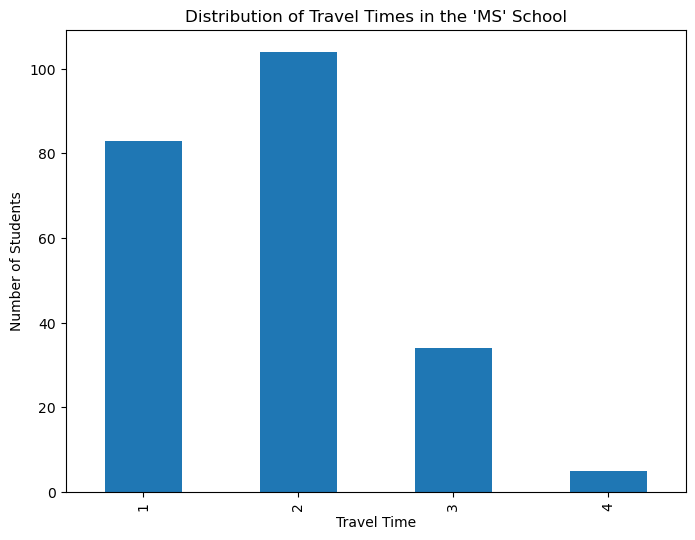

In [43]:
ms_students = data[data['school'] == 'MS']

plt.figure(figsize=(8, 6))
ms_students['traveltime'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Travel Times in the 'MS' School")
plt.xlabel("Travel Time")
plt.ylabel("Number of Students")
plt.show()

# 45 Compute the mean age of students who have extra-curricular activities (activities) and those who don't.


In [44]:
mean_age_with_activities = data[data['activities'] == 'yes']['age'].mean()
mean_age_without_activities = data[data['activities'] == 'no']['age'].mean()

print(f"extra-curricular  {mean_age_with_activities}")
print(f"without activities: {mean_age_without_activities}")

extra-curricular  16.676190476190477
without activities: 16.808383233532933


# 46 Group the data by 'sex' and 'address,' and find the median number of school absences for each group.


In [45]:
absences_median_by_group = data.groupby(['sex', 'address'])['absences'].median()

print("median number of school abs for sex, address")
print(absences_median_by_group)


median number of school abs for sex, address
sex  address
F    R          2.0
     U          2.0
M    R          2.0
     U          2.0
Name: absences, dtype: float64


# 47 Calculate the percentage of students who receive extra educational support (schoolsup) in the 'GP' school.


In [46]:
gp_students = data[data['school'] == 'GP']

percentage_schoolsup_gp = (gp_students['schoolsup'].value_counts(normalize=True) * 100).get('yes', 0)

percentage_schoolsup_gp

13.238770685579196

# 48 Create a scatter plot of 'G1' versus 'G3' for male students from the 'MS' school.


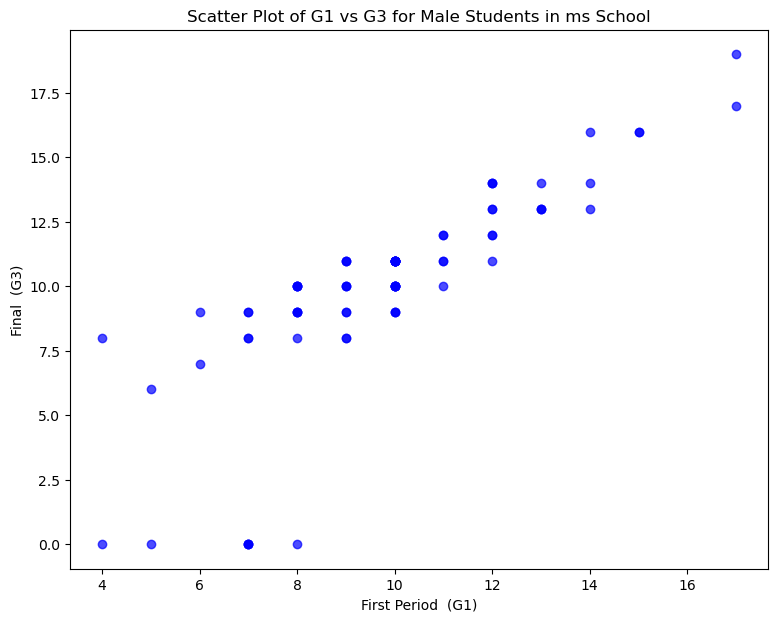

In [47]:
ms_male_students = data[(data['school'] == 'MS') & (data['sex'] == 'M')]

plt.figure(figsize=(9, 7))
plt.scatter(ms_male_students['G1'], ms_male_students['G3'], color='blue', alpha=0.7)
plt.title("Scatter Plot of G1 vs G3 for Male Students in ms School")
plt.xlabel("First Period  (G1)")
plt.ylabel("Final  (G3)")
plt.show()


# 49 Identify students with a unique combination of 'Mjob' and 'Fjob' that appears only once in the dataset.

In [48]:
job_combinations = data.groupby(['Mjob', 'Fjob']).size()

unique_job_combinations = job_combinations[job_combinations == 1]
unique_indices = unique_job_combinations.reset_index().set_index(['Mjob', 'Fjob']).index
unique_students = data.set_index(['Mjob', 'Fjob']).loc[unique_indices].reset_index()

print(unique_students[['Mjob', 'Fjob']])


     Mjob       Fjob
0  health  homemaker


# 50 Calculate the average final grade (G3) for students from 'GP' and 'MS' schools in each 'studytime' category.



In [49]:
average_grade_by_school_studytime = data.groupby(['school', 'studytime'])['G3'].mean()

print(average_grade_by_school_studytime)


school  studytime
GP      1            11.529412
        2            12.733010
        3            13.563380
        4            13.407407
MS      1             9.967742
        2            10.757576
        3            12.307692
        4            11.875000
Name: G3, dtype: float64
